# Pymaceuticals Inc.
---

### Analysis

Below you will find a summarization of the data from multiple studies in Mice of the range of experimental treatments for tumors. Care was taken to ensure that any duplicates were accounted for a removed from the reported data set to avoid potential double reporting of data for that subject, which would skew the results.

Upon initial review out of the 10 potential treatments, 2 appear to be promising for further research given their ability to reduce tumor growth. The successful treatments are Capomulin and Ramicane, they both produced the lowest tumor volumes throughout the trials, as well as producing the lowest final max tumor volume. That said, they do both have potential outliners (2 for Capomulin, 1 for Ramicane) that we would need to look into. Having said that I have called out a specific subject below "L509", who after day 20 of treatment with Capomulin had a significant drop in tumor volume.

One other set of data to point out is visible in the last chart of this set that provides a scatter view of the mouses weight(g) vs. average tumor volume and takes into account the r-value. With an r-value of 0.84, there appears to be a strong correlation between mouse weight and the volume of the tumor.


 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_data = pd.merge(mouse_metadata, study_results)
mouse_study_data = mouse_study_data.reindex(columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])

# Get the unique Mouse IDs in the order of study_results
order = study_results['Mouse ID'].unique()

# Create an empty list to store the summarized data
summary_data = []

# Iterate over each unique Mouse ID in the order of study_results
for mouse_id in order:
    mouse_data = mouse_study_data[mouse_study_data['Mouse ID'] == mouse_id]
    summary_data.append(mouse_data.iloc[0])

# Create the summarized dataframe
mouse_summary_data = pd.DataFrame(summary_data)

# Display the summarized data table
mouse_summary_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
300,b128,0,45.0,0,Capomulin,Female,9,22
851,f932,0,45.0,0,Ketapril,Male,15,29
857,g107,0,45.0,0,Ketapril,Female,2,29
511,a457,0,45.0,0,Ketapril,Female,11,30
717,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
number_of_mice = mouse_study_data["Mouse ID"].nunique()
print(number_of_mice)

249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mice = mouse_study_data[mouse_study_data.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()

print(f"Duplicate Mouse IDs:")
for mouse_id in duplicate_mouse_ids:
    print(mouse_id)

Duplicate Mouse IDs:
g989


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_g989 = mouse_study_data.loc[mouse_study_data["Mouse ID"] == "g989"]
mouse_g989.head(15)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
908,g989,0,45.000000,0,Propriva,Female,21,26
909,g989,0,45.000000,0,Propriva,Female,21,26
910,g989,5,48.786801,0,Propriva,Female,21,26
911,g989,5,47.570392,0,Propriva,Female,21,26
912,g989,10,51.745156,0,Propriva,Female,21,26
913,g989,10,49.880528,0,Propriva,Female,21,26
914,g989,15,51.325852,1,Propriva,Female,21,26
915,g989,15,53.442020,0,Propriva,Female,21,26
916,g989,20,55.326122,1,Propriva,Female,21,26
917,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
cleaned_mouse_data = mouse_study_data[mouse_study_data['Mouse ID'] != 'g989']
cleaned_mouse_data_first = cleaned_mouse_data.drop_duplicates(subset='Mouse ID', keep='first')

cleaned_mouse_data_first = cleaned_mouse_data_first.reindex(columns=["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"])

# Filter the rows based on the order of 'study_results' excluding 'Mouse ID' g989
cleaned_mouse_data_first = cleaned_mouse_data_first[cleaned_mouse_data_first['Mouse ID'].isin(order)]

# Set the 'Mouse ID' column as categorical with the order from mouse_summary_data
cleaned_mouse_data_first['Mouse ID'] = pd.Categorical(cleaned_mouse_data_first['Mouse ID'], categories=mouse_summary_data['Mouse ID'].unique(), ordered=True)

# Sort the cleaned data table based on the order of 'mouse_summary_data'
cleaned_mouse_data_first = cleaned_mouse_data_first.sort_values('Mouse ID')

cleaned_mouse_data_first = cleaned_mouse_data_first.reset_index(drop=True)
cleaned_mouse_data_first.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [6]:
# Checking the number of mice in the clean DataFrame.
cleaned_mouse_data_first = cleaned_mouse_data_first["Mouse ID"].nunique()
print(cleaned_mouse_data_first)

248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.
cleaned_mouse_data = pd.DataFrame(mouse_study_data)

by_drug_summary = cleaned_mouse_data.groupby(["Drug Regimen"])

mean_tumor_vol = by_drug_summary["Tumor Volume (mm3)"].mean()
median_tumor_vol = by_drug_summary["Tumor Volume (mm3)"].median()
var_tumor_vol = by_drug_summary["Tumor Volume (mm3)"].var()
std_tumor_vol = by_drug_summary["Tumor Volume (mm3)"].std()
sem_tumor_vol = by_drug_summary["Tumor Volume (mm3)"].sem()

by_drug_summary = pd.DataFrame({"Mean Tumor Volume": mean_tumor_vol, "Median Tumor Volume": median_tumor_vol, "Tumor Volume Variance": var_tumor_vol, "Tumor Volume Std. Dev.": std_tumor_vol, "Tumor Volume Std. Err.": sem_tumor_vol})

by_drug_summary.head(10)


,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
by_drug_summary = cleaned_mouse_data.groupby(["Drug Regimen"])

agg_summary_df = by_drug_summary.agg({"Tumor Volume (mm3)": ["mean", "median", "var", "std", "sem"]})

agg_summary_df.columns = agg_summary_df.columns.map("_".join)

agg_summary_df.head(10)

,Tumor Volume (mm3)_mean,Tumor Volume (mm3)_median,Tumor Volume (mm3)_var,Tumor Volume (mm3)_std,Tumor Volume (mm3)_sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

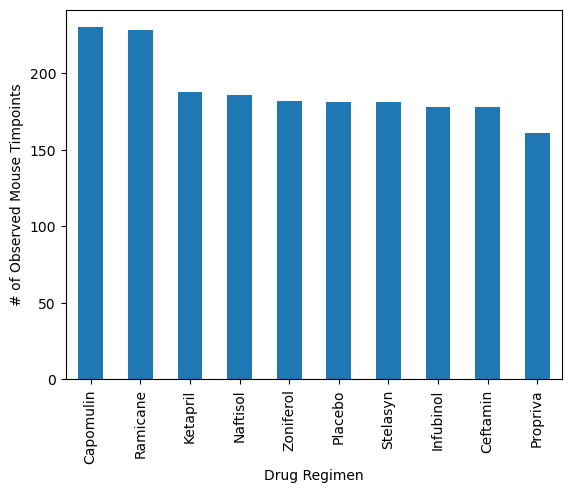

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
drug_counts = cleaned_mouse_data["Drug Regimen"].value_counts()
drug_counts.plot(kind="bar")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.show()

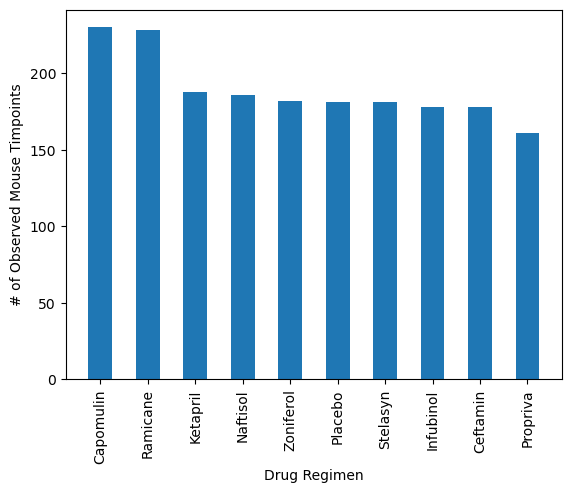

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
drug_counts = cleaned_mouse_data["Drug Regimen"].value_counts()
plt.bar(drug_counts.index, drug_counts.values, width=0.5)
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timpoints")
plt.xticks(rotation=90, ha='center')
plt.show()

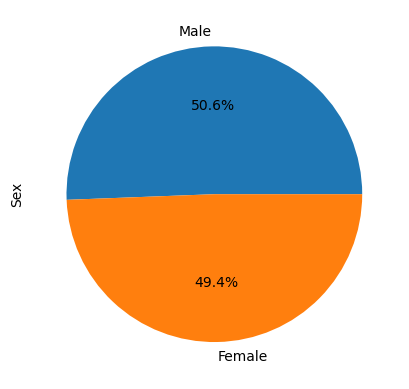

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
gender_counts = cleaned_mouse_data["Sex"].value_counts()

gender_counts.plot(kind="pie", autopct="%1.1f%%", startangle=0)

plt.ylabel("Sex")
plt.show()

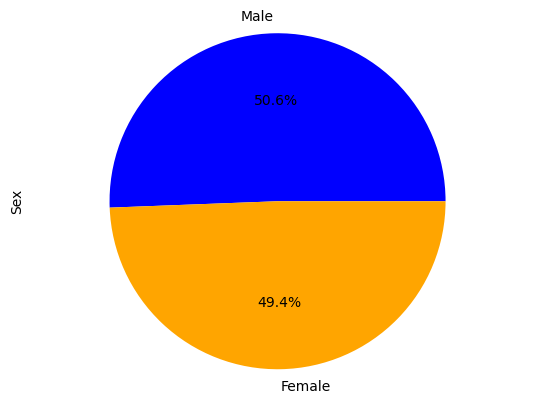

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = cleaned_mouse_data["Sex"].value_counts()

labels = ["Male", "Female"]
colors = ["blue", "orange"]

plt.pie(gender_counts, labels=labels, colors=colors, autopct="%1.1f%%", startangle=0)
plt.axis("equal")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

treatment_regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]
final_tumor_volume = pd.DataFrame(columns=["Treatment Regimen", "Max Final Tumor Volume"])

last_timepoint = cleaned_mouse_data.groupby("Mouse ID")["Timepoint"].max()
last_timepoint = last_timepoint.reset_index()

for regimen in treatment_regimens:
    regimen_df = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"] == regimen]
    max_tumor_volume = regimen_df.merge(last_timepoint, on=["Mouse ID", "Timepoint"])["Tumor Volume (mm3)"].max()
    final_tumor_volume = final_tumor_volume.append({"Treatment Regimen": regimen, "Max Final Tumor Volume": max_tumor_volume}, ignore_index=True)

final_tumor_volume.head()

C:\Users\joelw\AppData\Local\Temp\ipykernel_2320\1763581694.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_volume = final_tumor_volume.append({"Treatment Regimen": regimen, "Max Final Tumor Volume": max_tumor_volume}, ignore_index=True)
C:\Users\joelw\AppData\Local\Temp\ipykernel_2320\1763581694.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_volume = final_tumor_volume.append({"Treatment Regimen": regimen, "Max Final Tumor Volume": max_tumor_volume}, ignore_index=True)
C:\Users\joelw\AppData\Local\Temp\ipykernel_2320\1763581694.py:15: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_tumor_volume = final_tumor_volume.append({"Treatment Regimen": regimen, "Max Final Tumor Volume": max_tu

,Treatment Regimen,Max Final Tumor Volume
0,Capomulin,47.685963
1,Ramicane,45.220869
2,Infubinol,72.226731
3,Ceftamin,68.923185


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
# Create empty list to fill with tumor vol data (for plotting)
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    # Locate the rows which contain mice on each drug and get the tumor volumes
    # add subset 
    # Determine outliers using upper and lower bounds

tumor_vol_data = []

for regimen in treatment_regimens:
    
    tumor_volumes = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    
    # add subset 
    tumor_vol_data.append(tumor_volumes)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumor_volumes.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    
    # Calculate lower and upper bounds for outlier detection
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
       
    print(f"\n\nResults for {regimen}:")
        
    # Determine if there are any outliers
    outliers = tumor_volumes.loc[(tumor_volumes < lower_bound) | (tumor_volumes > upper_bound)]
    if outliers.empty:
        print("There are no potential outliers for this regimen.")
    else:
        print("The potential outliers are:")
        print(outliers)



Results for Capomulin:
The potential outliers are:
18    25.472143
19    23.343598
Name: Tumor Volume (mm3), dtype: float64


Results for Ramicane:
The potential outliers are:
9    22.050126
Name: Tumor Volume (mm3), dtype: float64


Results for Infubinol:
There are no potential outliers for this regimen.


Results for Ceftamin:
There are no potential outliers for this regimen.


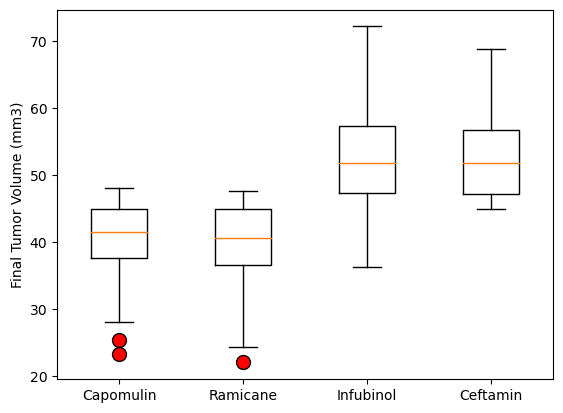

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
tumor_vol_data = []

for regimen in treatment_regimens:
    tumor_volumes = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"] == regimen, "Tumor Volume (mm3)"]
    tumor_vol_data.append(tumor_volumes)
    
plt.boxplot(tumor_vol_data, labels=treatment_regimens, flierprops=dict(marker='o', markerfacecolor='red', markersize=10))
plt.ylabel("Final Tumor Volume (mm3)")

plt.show()

## Line and Scatter Plots

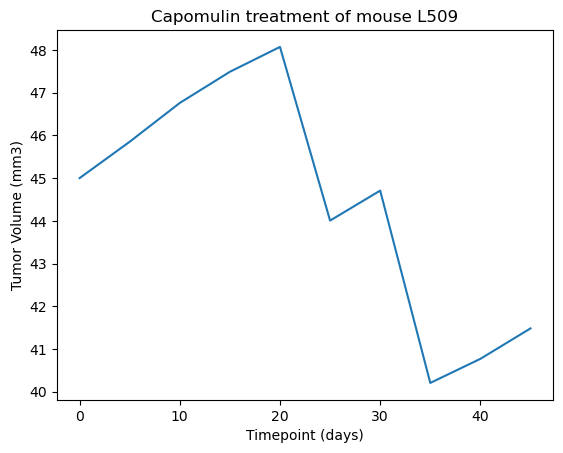

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouse_id = "l509"

capomulin_data = cleaned_mouse_data.loc[(cleaned_mouse_data["Drug Regimen"] == "Capomulin") & (cleaned_mouse_data["Mouse ID"] == mouse_id)]

plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"])
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse L509")

plt.show()

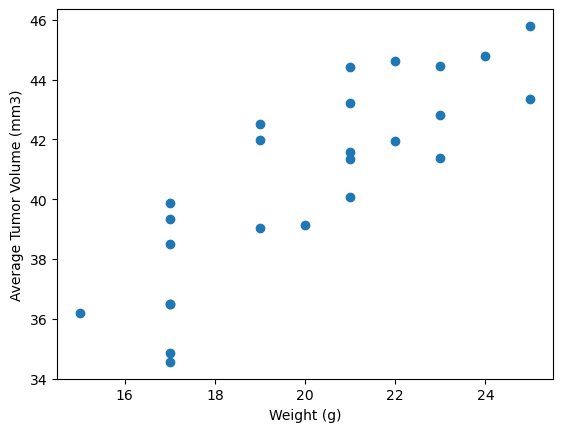

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"] == "Capomulin"]

average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
                                        
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()
                                        
plt.scatter(mouse_weights, average_tumor_volume)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.show()
                                        
                    

## Correlation and Regression

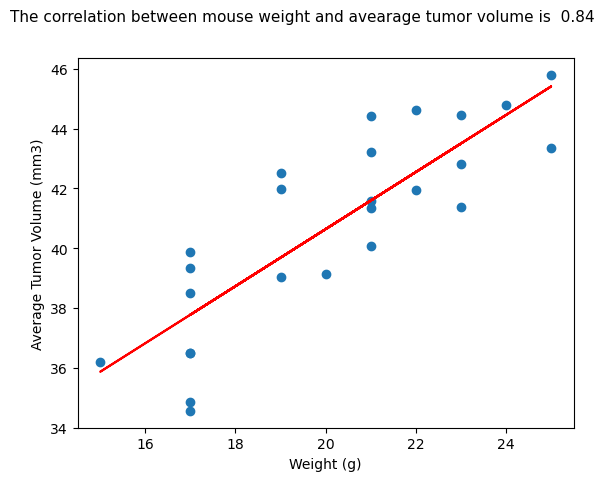

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
capomulin_data = cleaned_mouse_data.loc[cleaned_mouse_data["Drug Regimen"] == "Capomulin"]
average_tumor_volume = capomulin_data.groupby("Mouse ID")["Tumor Volume (mm3)"].mean()
mouse_weights = capomulin_data.groupby("Mouse ID")["Weight (g)"].mean()

correlation = np.corrcoef(mouse_weights, average_tumor_volume)[0, 1]

slope, intercept, r_value, p_value, std_err = st.linregress(mouse_weights, average_tumor_volume)

plt.scatter(mouse_weights, average_tumor_volume)

regress_values = slope * mouse_weights + intercept
plt.plot(mouse_weights, regress_values, color='red')
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.text(13, 48, f"The correlation between mouse weight and avearage tumor volume is {correlation: .2f}", fontsize=11, verticalalignment='top')

plt.show()

